# Elementary Probability with Matrices

This lecture uses matrix algebra to illustrate some basic ideas about probability theory.

After providing somewhat informal definitions of the underlying objects, we'll use matrices and vectors to describe probability distributions.

Among concepts that we'll be studying include

- a joint probability distribution 
- marginal distributions associated with a given joint distribution
- conditional probability distributions
- statistical independence of two random variables
- joint distributions associated with a prescribed set of marginal distributions
    - couplings
    - copulas
- the probability distribution of a sum of two independent random variables 
    - convolution of  marginal distributions
- parameters that define a probability distribution
- sufficient statistics as data summaries
  
We'll use a matrix to represent a bivariate probability distribution and a vector to represent a univariate probability distribution


As usual, we'll start with some imports

In [1]:
# !pip install prettytable

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline

/tmp/ipykernel_11799/4202758366.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Sketch of Basic Concepts

We'll briefly define what we mean by a **probability space**, a **probability measure**, and a **random variable**. 

For most of this lecture, we sweep these objects into the background, but they are there underlying the other objects that we'll mainly focus on.

Let $\Omega$ be a set of possible underlying outcomes and let $\omega \in \Omega$ be a particular underlying outcomes.

Let $\mathcal{G} \subset \Omega$ be a subset of $\Omega$. 

Let $\mathcal{F}$ be a collection of such subsets  $\mathcal{G} \subset \Omega$. 

The pair $\Omega,\mathcal{F}$  forms our **probability space** on which we want to put a probability measure. 

A **probability measure** $\mu$ maps a set of possible underlying outcomes  $\mathcal{G} \in \mathcal{F}$  into a scalar number between $0$ and $1$

- this is the "probability" that $X$ belongs to $A$, denoted by $ \textrm{Prob}\{X\in A\}$.

A **random variable** $X(\omega)$ is a function of the underlying outcome $\omega \in \Omega$.


The random variable $X(\omega)$  has a **probability distribution** that is induced by the underlying probability measure $\mu$ and the function
$X(\omega)$:

$$ 
\textrm{Prob} (X \in A ) = \int_{\mathcal{G}} \mu(\omega) d \omega 
$$ (eq:CDFfromdensity)

where ${\mathcal G}$ is the subset of $\Omega$ for which $X(\omega) \in A$.

We call this the induced probability distribution of random variable $X$.


## Digression: What Does Probability Mean? 

Before diving in, we'll say a few words about what probability theory means and how it connects to statistics.

These are topics that are also touched on in the quantecon lectures  <https://python.quantecon.org/prob_meaning.html> and <https://python.quantecon.org/navy_captain.html>.

For much of this lecture we'll be discussing  fixed "population" probabilities. 

These are purely mathematical objects.

To appreciate how statisticians connect probabilities to data, the key is to understand the following concepts:

* A single draw from a probability distribution
* Repeated independently  and identically distributed (i.i.d.)  draws of "samples" or "realizations" from the same probability distribution
* A **statistic** defined as a  function of a sequence of samples
* An **empirical distribution** or **histogram** (a binned empirical distribution) that records observed  **relative frequencies**
* The idea that a  population probability  distribution is  what we anticipate **relative frequencies** will be in a long sequence of i.i.d. draws. Here the following mathematical machinery makes precise what is meant by **anticipated relative frequencies** 
     - **Law of Large Numbers (LLN)**
     -  **Central Limit Theorem (CLT)** 


**Scalar example**


Consider the following discrete distribution

$$ 
X  \sim \{{f_i}\}_{i=0}^{I-1},\quad f_i \geqslant 0, \quad \sum_i f_i = 1
$$

Draw a sample $x_0, x_1, \dots , x_{N-1}$, $N$ draws of $X$ from $\{f_i\}^I_{i=1}$.

What do the "identical" and "independent" mean in   IID or iid ("identically and independently distributed)?

- "identical" means that each draw is from the same distribution.
- "independent" means that the joint distribution  equal tthe product of marginal distributions, i.e.,

$$
\begin{aligned}
\textrm{Prob}\{x_0 = i_0, x_1 = i_1, \dots , x_{N-1} = i_{N-1}\} &= \textrm{Prob}\{x_0 = i_0\} \cdot \dots \cdot \textrm{Prob}\{x_{I-1} = i_{I-1}\}\\
&= f_{i_0} f_{i_1} \cdot \dots \cdot f_{i_{N-1}}\\
\end{aligned}
$$

Consider the **empirical distribution**:

$$
\begin{aligned}
i & = 0,\dots,I-1,\\
N_i & = \text{number of times} \ X = i,\\
N & = \sum^{I-1}_{i=0} N_i \quad \text{total number of draws},\\
\tilde {f_i} &  = \frac{N_i}{N} \sim \ \text{frequency of draws for which}\  X=i
\end{aligned} 
$$


Key ideas that  justify connecting probability theory with statistics are laws of large numbers and central limit theorems

**LLN:** 

- A Law of Large Numbers (LLN) states that $\tilde {f_i} \to f_i \text{ as } N \to \infty$

**CLT:** 

- A Central Limit Theorem (CLT) describes a  **rate** at which $\tilde {f_i} \to f_i$


**Remarks** 

- For "frequentist" statisticians, **anticipated relative frequency**  is **all** that a probability distribution means. 

- But for a Bayesian it means something more or different.


## Representing  Probability Distributions

A  probability distribution $\textrm{Prob} (X \in A)$ can  be described by its **cumulative distribution function (CDF)**

$$
F_{X}(x) = \textrm{Prob}\{X\leq x\}. 
$$

Sometimes, but not always, a random variable can also be described by  **density function** $f(x)$ 
that is related to its CDF by

$$ 
\textrm{Prob} \{X\in B\} = \int_{t\in B}f(t)dt
$$

$$
F(x) = \int_{-\infty}^{x}f(t)dt
$$

Here $B$ is a set of possible $X$'s whose probability we want to compute.

When a probability density exists, a probability distribution can be characterized either by its CDF or by its  density.

For a **discrete-valued** random variable  

* the number  of possible values of $X$ is finite or countably infinite 
* we replace a  **density** with a **probability mass function**, a non-negative sequence that sums to one 
* we replace integration with summation in the formula like {eq}`eq:CDFfromdensity` that relates a CDF to a probability mass function 


In this lecture, we mostly discuss discrete random variables.  

Doing this enables us to confine our tool set basically to linear algebra.

Later we'll briefly discuss how to approximate a continuous random variable with a discrete random variable.


## Univariate Probability Distributions

We'll devote most of this lecture to discrete-valued random variables, but we'll say a few things
about continuous-valued random variables.


### Discrete random variable

Let $X$ be a discrete random variable that takes possible values: $i=0,1,\ldots,I-1 = \bar{X}$. 

Here, we choose  the maximum index $I-1$ because of how this aligns nicely with Python's index convention.

Define $f_i \equiv \textrm{Prob}\{X=i\}$
and assemble  the non-negative vector 

$$ 
f=\left[\begin{array}{c}
f_{0}\\
f_{1}\\
\vdots\\
f_{I-1}
\end{array}\right]
$$ (eq:discretedist)

for which  $f_{i} \in [0,1]$ for each $i$ and $\sum_{i=0}^{I-1}f_i=1$. 

This vector defines a **probability mass function**.

The distribution {eq}`eq:discretedist`
has **parameters**  $\{f_{i}\}_{i=0,1, \cdots ,I-2}$ since $f_{I-1} = 1-\sum_{i=0}^{I-2}f_{i}$.


These parameters pin down the shape of the distribution.

(Sometimes $I = \infty$.)

Such a "non-parametric" distribution has as many "parameters" as there are possible values of the random variable.


We often work with special  distributions that  are  characterized by  a small number  parameters. 

In these special parametric  distributions, 

$$ 
f_i = g(i; \theta)
$$

where $\theta $ is a vector of parameters that is of much smaller dimension than $I$.


**Remarks:**

- The concept of  **parameter** is intimately related to the notion of  **sufficient statistic**.
-  Sufficient statistic are  nonlinear function of a data set.
-  Sufficient statistics are designed to  summarize all  **information** about the parameters that is contained in the big data set. 
-  They are important tools that AI uses to reduce the size of a **big data** set
-  R. A. Fisher provided a sharp definition of **information** -- see <https://en.wikipedia.org/wiki/Fisher_information>


 
An example of a parametric probability distribution is  a **geometric distribution**.

It is described by

$$ 
f_{i} = \textrm{Prob}\{X=i\} = (1-\lambda)\lambda^{i},\quad \lambda \in [0,1], \quad i = 0, 1, 2, \ldots
$$ 

Evidently,  $\sum_{i=0}^{\infty}f_i=1$.

Let $\theta$ be a vector of parameters of the distribution described by $f$, then

$$ 
f_i( \theta)\ge0, \sum_{i=0}^{\infty}f_i(\theta)=1
$$

### Continuous random variable

Let $X$ be a continous random variable that takes values $X \in \tilde{X}\equiv[X_U,X_L]$ whose distributions have parameters $\theta$.

$$
\textrm{Prob}\{X\in A\} = \int_{x\in A} f(x;\theta)\,dx;  \quad f(x;\theta)\ge0
$$
  
where $A$ is a subset of $\tilde{X}$ and 
  
$$ 
\textrm{Prob}\{X\in \tilde{X}\} =1 
$$

## Bivariate Probability Distributions

We'll now discuss a bivariate **joint distribution**.

To begin, we restrict ourselves to two discrete random variables.

Let $X,Y$ be two discrete random variables that take values:

$$
X\in\{0,\ldots,J-1\} 
$$

$$
Y\in\{0,\ldots,J-1\}
$$

Then their **joint distribution** is described by a matrix 

$$
F_{I\times J}=[f_{ij}]_{i\in\{0,\ldots,J-1\}, j\in\{0,\ldots,J-1\}}
$$

whose elements are

$$
f_{ij}=\textrm{Prob}\{X=i,Y=j\} \geq 0
$$

where 

$$
\sum_{i}\sum_{j}f_{ij}=1
$$

## Marginal Probability Distributions

The joint distribution induce marginal distributions 

$$
\textrm{Prob}\{X=i\}= \sum_{j=0}^{J-1}f_{ij} = \mu_i, \quad i=0,\ldots,I-1
$$

$$
\textrm{Prob}\{Y=j\}= \sum_{i=0}^{I-1}f_{ij} = \nu_j, \quad j=0,\ldots,J-1 
$$

For example, let the joint distribution over $(X,Y)$ be 

$$
F = \left[
   \begin{matrix}
   .25 & .1\\
   .15 & .5
  \end{matrix}
\right]
$$ (eq:example101discrete)

Then marginal distributions are:

$$ 
\begin{aligned} 
\textrm{Prob} \{X=0\}&=.25+.1=.35\\
\textrm{Prob}\{X=1\}& =.15+.5=.65\\
\textrm{Prob}\{Y=0\}&=.25+.15=.4\\
\textrm{Prob}\{Y=1\}&=.1+.5=.6
\end{aligned}
$$

**Digression:** If two random variables $X,Y$ are continuous and have joint density $f(x,y)$, then marginal distributions can be computed by 

$$
\begin{aligned}
f(x)& = \int_{\mathbb{R}} f(x,y) dy\\
f(y)& = \int_{\mathbb{R}} f(x,y) dx
\end{aligned}
$$

## Conditional Probability  Distributions

Conditional probabilities are defined according to

$$
\textrm{Prob}\{A \mid B\}=\frac{\textrm{Prob}\{A \cap B\}}{\textrm{Prob}\{B\}}
$$

where $A, B$ are two events. 

For a pair of discrete random variables, we have  the **conditional distribution** 

$$
\textrm{Prob}\{X=i|Y=j\}=\frac{f_{ij}}{\sum_{i}f_{ij}} 
=\frac{\textrm{Prob} \{X=i, Y=j\} }{\textrm{Prob} \{Y=j\} }
$$

where $i=0, \ldots,I-1, \quad j=0,\ldots,J-1$.

Note that   

$$
\sum_{i}\textrm{Prob}\{X_i=i|Y_j=j\}
=\frac{ \sum_{i}f_{ij} }{ \sum_{i}f_{ij}}=1
$$

**Remark:** The mathematics  of conditional probability  implies **Bayes' Law**:

$$
\textrm{Prob}\{X=i|Y=j\}	=\frac{\textrm{Prob}\{X=i,Y=j\}}{\textrm{Prob}\{Y=j\}}=\frac{\textrm{Prob}\{Y=j|X=i\}\textrm{Prob}\{X=i\}}{\textrm{Prob}\{Y=j\}}
$$

For the joint distribution {eq}`eq:example101discrete`

$$
\textrm{Prob}\{X=0|Y=1\} =\frac{ .1}{.1+.5}=\frac{.1}{.6}
$$

## Statistical Independence

Random variables X and Y are statistically **independent** if 

$$ 
\textrm{Prob}\{X=i,Y=j\}={f_ig_i}
$$

where 

$$ 
\begin{aligned}
\textrm{Prob}\{X=i\} &=f_i\ge0， \sum{f_i}=1 \cr
\textrm{Prob}\{Y=j\} & =g_j\ge0， \sum{g_j}=1
\end{aligned}
$$

Conditional distributions are 

$$
\begin{aligned}
\textrm{Prob}\{X=i|Y=j\} & =\frac{f_ig_i}{\sum_{i}f_ig_j}=\frac{f_ig_i}{g_i}=f_i \\
\textrm{Prob}\{Y=j|X=i\} & =\frac{f_ig_i}{\sum_{j}f_ig_j}=\frac{f_ig_i}{f_i}=g_i
\end{aligned}
$$


## Means and Variances

The  mean and variance of a discrete random variable $X$  are

$$
\begin{aligned}
\mu_{X} & \equiv\mathbb{E}\left[X\right] 
=\sum_{k}k \textrm{Prob}\{X=k\} \\ 
\sigma_{X}^{2} & \equiv\mathbb{D}\left[X\right]=\sum_{k}\left(k-\mathbb{E}\left[X\right]\right)^{2}\textrm{Prob}\{X=k\}
\end{aligned} 
$$

A continuous random variable having  density $f_{X}(x)$) has  mean and variance 

$$
\begin{aligned}
\mu_{X} & \equiv\mathbb{E}\left[X\right]=\int_{-\infty}^{\infty}xf_{X}(x)dx \\
\sigma_{X}^{2}\equiv\mathbb{D}\left[X\right] & =\mathrm{E}\left[\left(X-\mu_{X}\right)^{2}\right]=\int_{-\infty}^{\infty}\left(x-\mu_{X}\right)^{2}f_{X}(x)dx
\end{aligned}
$$


## Classic Trick for Generating Random Numbers

Suppose we have at our disposal a pseudo random number that draws a uniform random variable, i.e., one with probability distribution

$$
\textrm{Prob}\{\tilde{X}=i\}=\frac{1}{I},\quad i=0,\ldots,I-1
$$

How can we transform $\tilde{X}$ to get a random variable $X$ for which $\textrm{Prob}\{X=i\}=f_i,\quad i=0,\ldots,I-1$,
 where $f_i$ is an arbitary discrete probability distribution on $i=0,1,\dots,I-1$?

The key tool is the inverse of a cumulative distribution function (CDF). 

Observe that the CDF of a distribution is monotone and non-decreasing, taking values between $0$ and $1$.

We can draw a sample of a random variable $X$ with a known CDF as follows:

- draw a random variable  $u$ from a uniform distribution on $[0,1]$
- pass the sample value of $u$ into the **"inverse"** target  CDF for $X$
- $X$ has the target CDF


Thus, knowing the **"inverse"** CDF of a distribution is enough to simulate from this distribution.

**NOTE**: The "inverse" CDF needs to exist for this method to work.

The inverse CDF is 

$$
F^{-1}(u)\equiv\inf \{x\in \mathbb{R}: F(x) \geq u\} \quad(0<u<1)
$$

Here  we use infimum because a CDF is a non-decreasing and right-continuous function. 

Thus, suppose that 

-  $U$ is a uniform random variable $U\in[0,1]$ 
-  We want to sample a random variable $X$ whose  CDF is  $F$.

It turns out that if we use draw uniform random numbers $U$ and then compute  $X$ from 

$$
X=F^{-1}(U),
$$

then $X$ ia a random variable  with CDF $F_X(x)=F(x)=\textrm{Prob}\{X\le x\}$.

We'll verify this in  the special case in which  $F$ is continuous and bijective so that its inverse function exists and  
can be  denoted by $F^{-1}$.

Note that 

$$
\begin{aligned}
F_{X}\left(x\right)	& =\textrm{Prob}\left\{ X\leq x\right\} \\
	& =\textrm{Prob}\left\{ F^{-1}\left(U\right)\leq x\right\} \\
	& =\textrm{Prob}\left\{ U\leq F\left(x\right)\right\} \\
	& =F\left(x\right) 
\end{aligned}
$$

where the last equality occurs  because $U$ is distributed uniformly on $[0,1]$ while $F(x)$ is a constant given $x$ that also lies on $[0,1]$.

Let's use  `numpy` to compute some examples.

**Example: A continuous geometric (exponential) distribution**

Let $X$ follow a geometric distribution, with parameter $\lambda>0$.

Its density function is 

$$
\quad f(x)=\lambda e^{-\lambda x}
$$

Its CDF is 

$$
F(x)=\int_{0}^{\infty}\lambda e^{-\lambda x}=1-e^{-\lambda x}
$$

Let $U$ follow a uniform distribution on $[0,1]$. 

$X$ is a random variable such that $U=F(X)$. 

The distribution $X$ can be deduced from 

$$ 
\begin{aligned}
U& =F(X)=1-e^{-\lambda X}\qquad\\
\implies & \quad -U=e^{-\lambda X}\\
\implies&  \quad \log(1-U)=-\lambda X\\
\implies & \quad X=\frac{(1-U)}{-\lambda}
\end{aligned}
$$

Let's draw $u$ from $U[0,1]$ and calculate $x=\frac{log(1-U)}{-\lambda}$.


We'll check whether  $X$  seems to follow a **continuous geometric** (exponential) distribution.

Let's check with `numpy`.

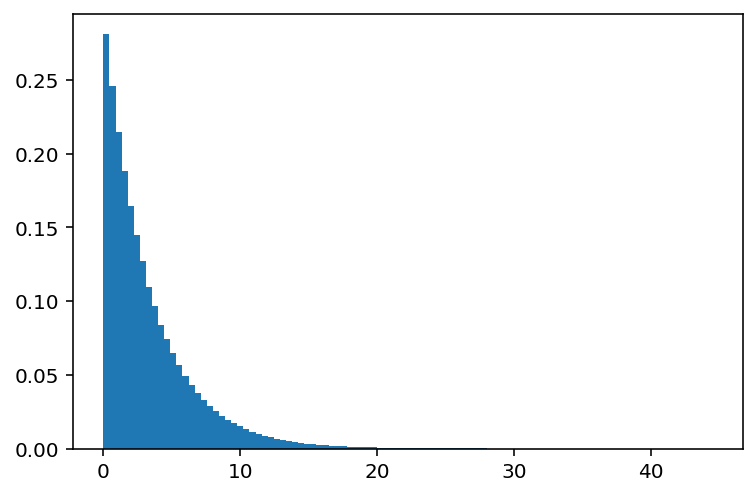

In [3]:
n, λ = 1_000_000, 0.3

# draw uniform numbers
u = np.random.rand(n)

# transform
x = -np.log(1-u)/λ

# draw geometric distributions
x_g = np.random.exponential(1 / λ, n)

# plot and compare
plt.hist(x, bins=100, density=True)
plt.show()

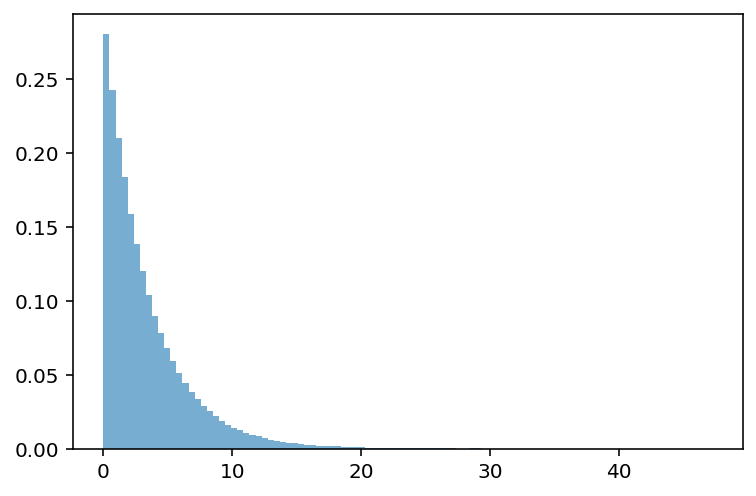

In [4]:
plt.hist(x_g, bins=100, density=True, alpha=0.6)
plt.show()

**Geometric distribution**

Let $X$ distributed geometrically, that is

$$
\begin{aligned} 
\textrm{Prob}(X=i) & =(1-\lambda)\lambda^i,\quad\lambda\in(0,1), \quad  i=0,1,\dots \\
 & \sum_{i=0}^{\infty}\textrm{Prob}(X=i)=1\longleftrightarrow(1- \lambda)\sum_{i=0}^{\infty}\lambda^i=\frac{1-\lambda}{1-\lambda}=1
\end{aligned}
$$

Its CDF is given by

$$
\begin{aligned}
\textrm{Prob}(X\le i)& =(1-\lambda)\sum_{j=0}^{i}\lambda^i\\
& =(1-\lambda)[\frac{1-\lambda^{i+1}}{1-\lambda}]\\
& =1-\lambda^{i+1}\\
& =F(X)=F_i \quad 
\end{aligned}
$$

Again, let $\tilde{U}$ follow a uniform distribution and we want to find $X$ such that $F(X)=\tilde{U}$.

Let's deduce the distribution of $X$ from

$$
\begin{aligned}
\tilde{U} & =F(X)=1-\lambda^{x+1}\\
1-\tilde{U} & =\lambda^{x+1}\\
log(1-\tilde{U})& =(x+1)\log\lambda\\
\frac{\log(1-\tilde{U})}{\log\lambda}& =x+1\\
\frac{\log(1-\tilde{U})}{\log\lambda}-1 &=x
\end{aligned}
$$

However, $\tilde{U}=F^{-1}(X)$ may not be an integer for any $x\geq0$.

So let

$$
x=\lceil\frac{\log(1-\tilde{U})}{\log\lambda}-1\rceil
$$

where $\lceil . \rceil$ is the ceiling function.

Thus $x$ is the smallest integer such that the discrete geometric CDF is greater than or equal to $\tilde{U}$.

We can verify that $x$ is indeed geometrically distributed by the following `numpy` program.

**Note:** The exponential distribution is the continuous analog of geometric distribution.

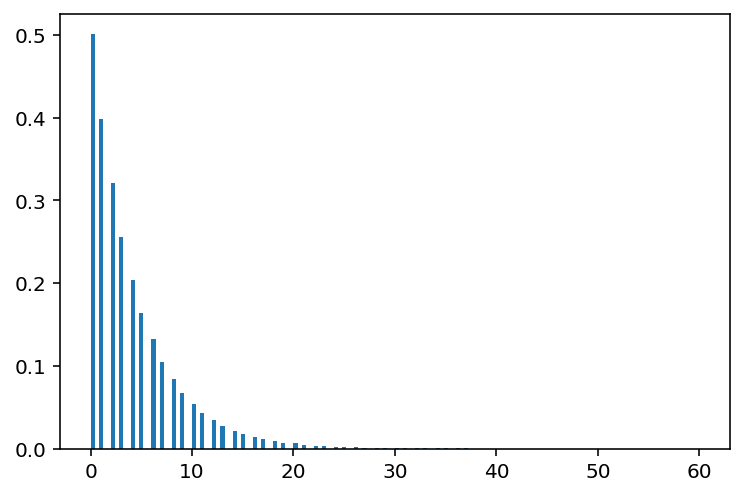

In [5]:
n, λ = 1_000_000, 0.8

# draw uniform numbers
u = np.random.rand(n)

# transform
x = np.ceil(np.log(1-u)/np.log(λ) - 1)

# draw geometric distributions
x_g = np.random.geometric(1-λ, n)

# plot and compare
plt.hist(x, bins=150, density=True)
plt.show()

In [6]:
np.random.geometric(1-λ, n).max()

65

In [7]:
np.log(0.4)/np.log(0.3)

0.7610560044063083

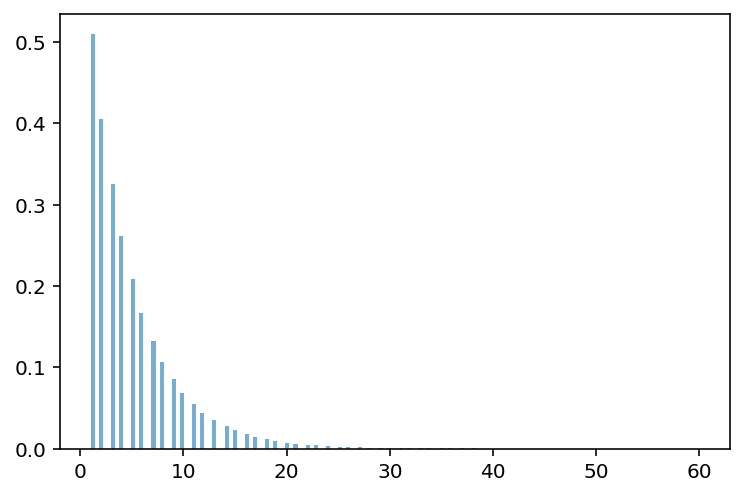

In [8]:
plt.hist(x_g, bins=150, density=True, alpha=0.6)
plt.show()

## Some Discrete Probability Distributions


Let's write some Python code to compute   means and variances of some  univariate random variables.

We'll use our code to 

- compute population means and variances from the probability distribution
- generate  a sample  of $N$ independently and identically distributed draws and compute sample means and variances
- compare population and sample means and variances

## Geometric distribution  

$$
\textrm{Prob}(X=k)=(1-p)^{k-1}p,k=1,2, \ldots 
$$

$\implies$

$$
\begin{aligned}
\mathbb{E}(X) & =\frac{1}{p}\\\mathbb{D}(X) & =\frac{1-p}{p^2} 
\end{aligned}
$$

We draw observations from the distribution and compare the sample mean and variance with the theoretical results.

In [9]:
# specify parameters
p, n = 0.3, 1_000_000

# draw observations from the distribution
x = np.random.geometric(p, n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)

# compare with theoretical results
print("\nThe population mean is: ", 1/p)
print("The population variance is: ", (1-p)/(p**2))

The sample mean is:  3.331871 
The sample variance is:  7.778730639359001

The population mean is:  3.3333333333333335
The population variance is:  7.777777777777778


### Newcomb–Benford distribution

The **Newcomb–Benford law** fits  many data sets, e.g., reports of incomes to tax authorities, in which 
the leading digit is more likely to be small than large. 

See <https://en.wikipedia.org/wiki/Benford%27s_law>

A Benford probability distribution is

$$
\textrm{Prob}\{X=d\}=\log _{10}(d+1)-\log _{10}(d)=\log _{10}\left(1+\frac{1}{d}\right)
$$

where $d\in\{1,2,\cdots,9\}$ can be thought of as a **first digit** in a sequence of digits.

This is a well defined discrete distribution since we can verify that probabilities are nonnegative and sum to $1$.

$$
\log_{10}\left(1+\frac{1}{d}\right)\geq0,\quad\sum_{d=1}^{9}\log_{10}\left(1+\frac{1}{d}\right)=1
$$

The mean and variance of a Benford distribution are

$$
\begin{aligned} 
\mathbb{E}\left[X\right]	 &=\sum_{d=1}^{9}d\log_{10}\left(1+\frac{1}{d}\right)\simeq3.4402 \\
\mathbb{V}\left[X\right]	 & =\sum_{d=1}^{9}\left(d-\mathbb{E}\left[X\right]\right)^{2}\log_{10}\left(1+\frac{1}{d}\right)\simeq6.0565
\end{aligned}
$$

We verify the above and compute the mean and variance using `numpy`.

In [10]:
Benford_pmf = np.array([np.log10(1+1/d) for d in range(1,10)])
k = np.array(range(1,10))

# mean
mean = np.sum(Benford_pmf * k)

# variance
var = np.sum([(k-mean)**2 * Benford_pmf])

# verify sum to 1
print(np.sum(Benford_pmf))
print(mean)
print(var)

0.9999999999999999
3.440236967123206
6.056512631375667


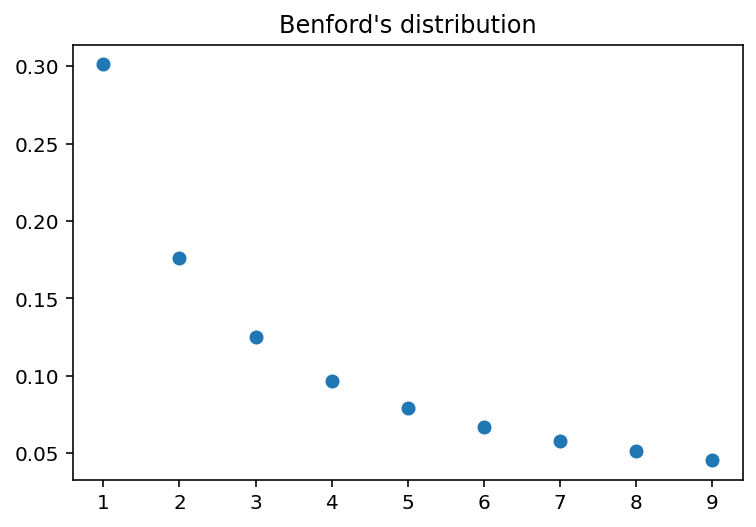

In [11]:
# plot distribution
plt.plot(range(1,10), Benford_pmf, 'o')
plt.title('Benford\'s distribution')
plt.show()

### Pascal (negative binomial) distribution 

Consider a sequence of independent Bernoulli trials.

Let $p$ be the probability of success. 

Let $X$ be a random variable that represents the number of failures before we get $r$ success. 

Its distribution is 

$$ 
\begin{aligned}
X  & \sim NB(r,p) \\
\textrm{Prob}(X=k;r,p) & = \begin{pmatrix}k+r-1 \\ r-1 \end{pmatrix}p^r(1-p)^{k} 
\end{aligned}
$$

Here, we choose from among $k+r-1$ possible outcomes  because the last draw is by definition a success.

We compute the mean and variance to be 


$$
\begin{aligned}
\mathbb{E}(X) & = \frac{k(1-p)}{p} \\
\mathbb{V}(X) & = \frac{k(1-p)}{p^2}
\end{aligned}
$$

In [12]:
# specify parameters
r, p, n = 10, 0.3, 1_000_000

# draw observations from the distribution
x = np.random.negative_binomial(r, p, n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)
print("\nThe population mean is: ", r*(1-p)/p)
print("The population variance is: ", r*(1-p)/p**2)

The sample mean is:  23.341658 
The sample variance is:  77.70832181103599

The population mean is:  23.333333333333336
The population variance is:  77.77777777777779


## Continuous Random Variables

### Univariate Gaussian distribution

We write 

$$ 
X \sim N(\mu,\sigma^2)
$$

to indicate the probability distribution

$$f(x|u,\sigma^2)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{[-\frac{1}{2\sigma^2}(x-u)^2]} $$ 

In the below example, we set $\mu = 0, \sigma = 0.1$.

In [13]:
# specify parameters
μ, σ = 0, 0.1

# specify number of draws
n = 1_000_000

# draw observations from the distribution
x = np.random.normal(μ, σ, n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ_hat = np.std(x)

print("The sample mean is: ", μ_hat)
print("The sample standard deviation is: ", σ_hat)

The sample mean is:  0.00012149877467040514
The sample standard deviation is:  0.10011461774096479


In [14]:
# compare
print(μ-μ_hat < 1e-3)
print(σ-σ_hat < 1e-3)

True
True


### Uniform Distribution

$$
\begin{aligned}
X & \sim U[a,b] \\
f(x)& = \begin{cases} \frac{1}{b-a}, & a \leq x \leq b \\ \quad0, & \text{otherwise}  \end{cases}
\end{aligned}
$$

The population mean and variance are

$$ 
\begin{aligned}
\mathbb{E}(X) & = \frac{a+b}{2} \\
\mathbb{V}(X) & = \frac{(b-a)^2}{12} 
\end{aligned}
$$

In [15]:
# specify parameters
a, b = 10, 20

# specify number of draws
n = 1_000_000

# draw observations from the distribution
x = a + (b-a)*np.random.rand(n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)
print("\nThe population mean is: ", (a+b)/2)
print("The population variance is: ", (b-a)**2/12)

The sample mean is:  14.99851318987227 
The sample variance is:  8.3377892546485

The population mean is:  15.0
The population variance is:  8.333333333333334


##  A Mixed Discrete-Continuous Distribution

We'll motivate this example with  a little story.


Suppose that  to apply for a job  you take an interview and either pass or fail it.

You have $5\%$ chance to pass an interview and you know your salary will uniformly distributed in the interval 300~400 a day only if you pass. 

We can describe your daily salary as  a discrete-continuous variable with the following probabilities:

$$ 
P(X=0)=0.95
$$

$$
P(300\le X \le 400)=\int_{300}^{400} f(x)\, dx=0.05
$$

$$
f(x) = 0.0005
$$

Let's start by generating a random sample and computing sample moments.

In [16]:
x = np.random.rand(1_000_000)
# x[x > 0.95] = 100*x[x > 0.95]+300
x[x > 0.95] = 100*np.random.rand(len(x[x > 0.95]))+300
x[x <= 0.95] = 0

μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)

The sample mean is:  17.429174771049755 
The sample variance is:  5835.266125950639


The analytical mean and variance can be computed:

$$
\begin{aligned}
\mu &= \int_{300}^{400}xf(x)dx \\
&= 0.0005\int_{300}^{400}xdx \\
&= 0.0005 \times \frac{1}{2}x^2\bigg|_{300}^{400}
\end{aligned}
$$

$$
\begin{aligned}
\sigma^2 &= 0.95\times(0-17.5)^2+\int_{300}^{400}(x-17.5)^2f(x)dx \\
&= 0.95\times17.5^2+0.0005\int_{300}^{400}(x-17.5)^2dx \\
&= 0.95\times17.5^2+0.0005 \times \frac{1}{3}(x-17.5)^3 \bigg|_{300}^{400} 
\end{aligned}
$$

In [17]:
mean = 0.0005*0.5*(400**2 - 300**2)
var = 0.95*17.5**2+0.0005/3*((400-17.5)**3-(300-17.5)**3)
print("mean: ", mean)
print("variance: ", var)

mean:  17.5
variance:  5860.416666666666


## Matrix Representation of Some Bivariate Distributions

Let's use matrices to represent a joint distribution, conditional distribution, marginal distribution, and the mean and variance of a  bivariate random variable.

The table below illustrates a  probability distribution  for a bivariate random variable. 

$$
F=[f_{ij}]=\left[\begin{array}{cc}
0.3 & 0.2\\
0.1 & 0.4
\end{array}\right]
$$

Marginal distributions are

$$ \textrm{Prob}(X=i)=\sum_j{f_{ij}}=u_i  $$
$$ \textrm{Prob}(Y=j)=\sum_i{f_{ij}}=v_j $$

Below we draw some samples  confirm that the "sampling" distribution agrees well  with the "population" distribution.

**Sample results:**

In [18]:
# specify parameters
xs = np.array([0, 1])
ys = np.array([10, 20])
f = np.array([[0.3, 0.2], [0.1, 0.4]])
f_cum = np.cumsum(f)

# draw random numbers
p = np.random.rand(1_000_000)
x = np.vstack([xs[1]*np.ones(p.shape), ys[1]*np.ones(p.shape)])
# map to the bivariate distribution

x[0, p < f_cum[2]] = xs[1]
x[1, p < f_cum[2]] = ys[0]

x[0, p < f_cum[1]] = xs[0]
x[1, p < f_cum[1]] = ys[1]

x[0, p < f_cum[0]] = xs[0]
x[1, p < f_cum[0]] = ys[0]
print(x)

[[ 0.  0.  1. ...  0.  0.  0.]
 [20. 10. 20. ... 10. 20. 10.]]


Here, we use exactly the inverse CDF technique to generate sample from the joint distribution $F$.

In [19]:
# marginal distribution
xp = np.sum(x[0, :] == xs[0])/1_000_000
yp = np.sum(x[1, :] == ys[0])/1_000_000

# print output
print("marginal distribution for x")
xmtb = pt.PrettyTable()
xmtb.field_names = ['x_value', 'x_prob']
xmtb.add_row([xs[0], xp])
xmtb.add_row([xs[1], 1-xp])
print(xmtb)

print("\nmarginal distribution for y")
ymtb = pt.PrettyTable()
ymtb.field_names = ['y_value', 'y_prob']
ymtb.add_row([ys[0], yp])
ymtb.add_row([ys[1], 1-yp])
print(ymtb)

marginal distribution for x
+---------+----------+
| x_value |  x_prob  |
+---------+----------+
|    0    | 0.499899 |
|    1    | 0.500101 |
+---------+----------+

marginal distribution for y
+---------+--------------------+
| y_value |       y_prob       |
+---------+--------------------+
|    10   |      0.399611      |
|    20   | 0.6003890000000001 |
+---------+--------------------+


In [20]:
# conditional distributions
xc1 = x[0, x[1, :] == ys[0]]
xc2 = x[0, x[1, :] == ys[1]]
yc1 = x[1, x[0, :] == xs[0]]
yc2 = x[1, x[0, :] == xs[1]]

xc1p = np.sum(xc1 == xs[0])/len(xc1)
xc2p = np.sum(xc2 == xs[0])/len(xc2)
yc1p = np.sum(yc1 == ys[0])/len(yc1)
yc2p = np.sum(yc2 == ys[0])/len(yc2)

# print output
print("conditional distribution for x")
xctb = pt.PrettyTable()
xctb.field_names = ['y_value', 'prob(x=0)', 'prob(x=1)']
xctb.add_row([ys[0], xc1p, 1-xc1p])
xctb.add_row([ys[1], xc2p, 1-xc2p])
print(xctb)

print("\nconditional distribution for y")
yctb = pt.PrettyTable()
yctb.field_names = ['x_value',  'prob(y=10)', 'prob(y=20)']
yctb.add_row([xs[0], yc1p, 1-yc1p])
yctb.add_row([xs[1], yc2p, 1-yc2p])
print(yctb)

conditional distribution for x
+---------+--------------------+---------------------+
| y_value |     prob(x=0)      |      prob(x=1)      |
+---------+--------------------+---------------------+
|    10   |  0.75107041597954  | 0.24892958402045995 |
|    20   | 0.3327226181692203 |  0.6672773818307798 |
+---------+--------------------+---------------------+

conditional distribution for y
+---------+--------------------+---------------------+
| x_value |     prob(y=10)     |      prob(y=20)     |
+---------+--------------------+---------------------+
|    0    | 0.6003932794424474 | 0.39960672055755264 |
|    1    | 0.1989098202163163 |  0.8010901797836837 |
+---------+--------------------+---------------------+


Let's  calculate population  marginal and conditional probabilities  using matrix algebra.

$$
\left[\begin{array}{cccccc}
\  & \vdots & y_{1} & y_{2} & \vdots & x\\
\cdots & \vdots & \cdots & \cdots & \vdots & \cdots\\
x_{1} & \vdots & 0.3 & 0.2 & \vdots & 0.5\\
x_{2} & \vdots & 0.1 & 0.4 & \vdots & 0.5\\
\cdots & \vdots & \cdots & \cdots & \vdots & \cdots\\
y & \vdots & 0.4 & 0.6 & \vdots & 1
\end{array}\right]
$$

$\implies$

(1) Marginal distribution:

$$
\left[\begin{array}{cccccc}
var & \vdots & var_1 & var_2 \\
\cdots & \vdots & \cdots & \cdots \\
x & \vdots & 0.5 & 0.5 \\
\cdots & \vdots & \cdots & \cdots \\
y & \vdots & 0.4 & 0.6 \\
\end{array}\right]
$$

(2) Conditional distribution:

$$
\left[\begin{array}{cccccc}
\quad x & \vdots & \quad x_1 & \quad x_2 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\
y=y_1 & \vdots & \frac{0.3}{0.4}=0.75 & \frac{0.1}{0.4}=0.25 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\
y=y_2 & \vdots & \frac{0.2}{0.6}\approx 0.33 & \frac{0.4}{0.6}\approx0.67 \\
\end{array}\right]
$$

$$
\left[\begin{array}{cccccc}
\quad y & \vdots & \quad y_1 & \quad y_2 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\
x=x_1 & \vdots & \frac{0.3}{0.5}=0.6 & \frac{0.2}{0.5}=0.4 \\
\cdots\cdots\cdots & \vdots & \cdots\cdots\cdots & \cdots\cdots\cdots \\
x=x_2 & \vdots & \frac{0.1}{0.5}=0.2 & \frac{0.4}{0.5}=0.8 \\
\end{array}\right]
$$

These population objects closely resemble  sample counterparts  computed above.

Let's wrap some of the functions we have used in  a Python class for a general discrete bivariate joint distribution.

In [21]:
class discrete_bijoint:

    def __init__(self, f, xs, ys):
        '''initialization
        -----------------
        parameters:
        f: the bivariate joint probability matrix
        xs: values of x vector
        ys: values of y vector
        '''
        self.f, self.xs, self.ys = f, xs, ys

    def joint_tb(self):
        '''print the joint distribution table'''
        xs = self.xs
        ys = self.ys
        f = self.f
        jtb = pt.PrettyTable()
        jtb.field_names = ['x_value/y_value', *ys, 'marginal sum for x']
        for i in range(len(xs)):
            jtb.add_row([xs[i], *f[i, :], np.sum(f[i, :])])
        jtb.add_row(['marginal_sum for y', *np.sum(f, 0), np.sum(f)])
        print("\nThe joint probability distribution for x and y\n", jtb)
        self.jtb = jtb

    def draw(self, n):
        '''draw random numbers
        ----------------------
        parameters:
        n: number of random numbers to draw
        '''
        xs = self.xs
        ys = self.ys
        f_cum = np.cumsum(self.f)
        p = np.random.rand(n)
        x = np.empty([2, p.shape[0]])
        lf = len(f_cum)
        lx = len(xs)-1
        ly = len(ys)-1
        for i in range(lf):
            x[0, p < f_cum[lf-1-i]] = xs[lx]
            x[1, p < f_cum[lf-1-i]] = ys[ly]
            if ly == 0:
                lx -= 1
                ly = len(ys)-1
            else:
                ly -= 1
        self.x = x
        self.n = n

    def marg_dist(self):
        '''marginal distribution'''
        x = self.x
        xs = self.xs
        ys = self.ys
        n = self.n
        xmp = [np.sum(x[0, :] == xs[i])/n for i in range(len(xs))]
        ymp = [np.sum(x[1, :] == ys[i])/n for i in range(len(ys))]

        # print output
        xmtb = pt.PrettyTable()
        ymtb = pt.PrettyTable()
        xmtb.field_names = ['x_value', 'x_prob']
        ymtb.field_names = ['y_value', 'y_prob']
        for i in range(max(len(xs), len(ys))):
            if i < len(xs):
                xmtb.add_row([xs[i], xmp[i]])
            if i < len(ys):
                ymtb.add_row([ys[i], ymp[i]])
        xmtb.add_row(['sum', np.sum(xmp)])
        ymtb.add_row(['sum', np.sum(ymp)])
        print("\nmarginal distribution for x\n", xmtb)
        print("\nmarginal distribution for y\n", ymtb)

        self.xmp = xmp
        self.ymp = ymp

    def cond_dist(self):
        '''conditional distribution'''
        x = self.x
        xs = self.xs
        ys = self.ys
        n = self.n
        xcp = np.empty([len(ys), len(xs)])
        ycp = np.empty([len(xs), len(ys)])
        for i in range(max(len(ys), len(xs))):
            if i < len(ys):
                xi = x[0, x[1, :] == ys[i]]
                idx = xi.reshape(len(xi), 1) == xs.reshape(1, len(xs))
                xcp[i, :] = np.sum(idx, 0)/len(xi)
            if i < len(xs):
                yi = x[1, x[0, :] == xs[i]]
                idy = yi.reshape(len(yi), 1) == ys.reshape(1, len(ys))
                ycp[i, :] = np.sum(idy, 0)/len(yi)

        # print output
        xctb = pt.PrettyTable()
        yctb = pt.PrettyTable()
        xctb.field_names = ['x_value', *xs, 'sum']
        yctb.field_names = ['y_value', *ys, 'sum']
        for i in range(max(len(xs), len(ys))):
            if i < len(ys):
                xctb.add_row([ys[i], *xcp[i], np.sum(xcp[i])])
            if i < len(xs):
                yctb.add_row([xs[i], *ycp[i], np.sum(ycp[i])])
        print("\nconditional distribution for x\n", xctb)
        print("\nconditional distribution for y\n", yctb)

        self.xcp = xcp
        self.xyp = ycp

Let's apply our code to some examples.

**Example 1**

In [22]:
# joint
d = discrete_bijoint(f, xs, ys)
d.joint_tb()


The joint probability distribution for x and y
 +--------------------+-----+--------------------+--------------------+
|  x_value/y_value   |  10 |         20         | marginal sum for x |
+--------------------+-----+--------------------+--------------------+
|         0          | 0.3 |        0.2         |        0.5         |
|         1          | 0.1 |        0.4         |        0.5         |
| marginal_sum for y | 0.4 | 0.6000000000000001 |        1.0         |
+--------------------+-----+--------------------+--------------------+


In [23]:
# sample marginal
d.draw(1_000_000)
d.marg_dist()


marginal distribution for x
 +---------+----------+
| x_value |  x_prob  |
+---------+----------+
|    0    | 0.500551 |
|    1    | 0.499449 |
|   sum   |   1.0    |
+---------+----------+

marginal distribution for y
 +---------+----------+
| y_value |  y_prob  |
+---------+----------+
|    10   | 0.400562 |
|    20   | 0.599438 |
|   sum   |   1.0    |
+---------+----------+


In [24]:
# sample conditional
d.cond_dist()


conditional distribution for x
 +---------+--------------------+---------------------+-----+
| x_value |         0          |          1          | sum |
+---------+--------------------+---------------------+-----+
|    10   | 0.7501410518221898 | 0.24985894817781018 | 1.0 |
|    20   | 0.3337676290125084 |  0.6662323709874917 | 1.0 |
+---------+--------------------+---------------------+-----+

conditional distribution for y
 +---------+---------------------+---------------------+-----+
| y_value |          10         |          20         | sum |
+---------+---------------------+---------------------+-----+
|    0    |  0.6002944754880122 | 0.39970552451198776 | 1.0 |
|    1    | 0.20038882848899486 |  0.7996111715110051 | 1.0 |
+---------+---------------------+---------------------+-----+


**Example 2**

In [25]:
xs_new = np.array([10, 20, 30])
ys_new = np.array([1, 2])
f_new = np.array([[0.2, 0.1], [0.1, 0.3], [0.15, 0.15]])
d_new = discrete_bijoint(f_new, xs_new, ys_new)
d_new.joint_tb()


The joint probability distribution for x and y
 +--------------------+---------------------+------+---------------------+
|  x_value/y_value   |          1          |  2   |  marginal sum for x |
+--------------------+---------------------+------+---------------------+
|         10         |         0.2         | 0.1  | 0.30000000000000004 |
|         20         |         0.1         | 0.3  |         0.4         |
|         30         |         0.15        | 0.15 |         0.3         |
| marginal_sum for y | 0.45000000000000007 | 0.55 |         1.0         |
+--------------------+---------------------+------+---------------------+


In [26]:
d_new.draw(1_000_000)
d_new.marg_dist()


marginal distribution for x
 +---------+----------+
| x_value |  x_prob  |
+---------+----------+
|    10   | 0.300225 |
|    20   | 0.400263 |
|    30   | 0.299512 |
|   sum   |   1.0    |
+---------+----------+

marginal distribution for y
 +---------+----------+
| y_value |  y_prob  |
+---------+----------+
|    1    | 0.449548 |
|    2    | 0.550452 |
|   sum   |   1.0    |
+---------+----------+


In [27]:
d_new.cond_dist()


conditional distribution for x
 +---------+---------------------+---------------------+---------------------+--------------------+
| x_value |          10         |          20         |          30         |        sum         |
+---------+---------------------+---------------------+---------------------+--------------------+
|    1    |  0.4452917152339683 | 0.22146467118083052 | 0.33324361358520116 |        1.0         |
|    2    | 0.18175063402440175 |  0.5462855980176291 | 0.27196376795796906 | 0.9999999999999999 |
+---------+---------------------+---------------------+---------------------+--------------------+

conditional distribution for y
 +---------+--------------------+---------------------+-----+
| y_value |         1          |          2          | sum |
+---------+--------------------+---------------------+-----+
|    10   | 0.6667665917228746 |  0.3332334082771255 | 1.0 |
|    20   | 0.2487339574229944 |  0.7512660425770056 | 1.0 |
|    30   | 0.500176954512674  | 0.

## A Continuous Bivariate Random Vector 


A two-dimensional Gaussian distribution has  joint density 

$$ 
f(x,y) =(2\pi\sigma_1\sigma_2\sqrt{1-\rho^2})^{-1}\exp\left[-\frac{1}{2(1-\rho^2)}\left(\frac{(x-\mu_1)^2}{\sigma_1^2}-\frac{2\rho(x-\mu_1)(y-\mu_2)}{\sigma_1\sigma_2}+\frac{(y-\mu_2)^2}{\sigma_2^2}\right)\right] 
$$


$$
\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}\exp\left[-\frac{1}{2(1-\rho^2)}\left(\frac{(x-\mu_1)^2}{\sigma_1^2}-\frac{2\rho(x-\mu_1)(y-\mu_2)}{\sigma_1\sigma_2}+\frac{(y-\mu_2)^2}{\sigma_2^2}\right)\right] 
$$

We start with a  bivariate normal distribution pinned down by

$$
\mu=\left[\begin{array}{c}
0\\
5
\end{array}\right],\quad\Sigma=\left[\begin{array}{cc}
5 & .2\\
.2 & 1
\end{array}\right]
$$

In [28]:
# define the joint probability density function
def func(x, y, μ1=0, μ2=5, σ1=np.sqrt(5), σ2=np.sqrt(1), ρ=.2/np.sqrt(5*1)):
    A = (2 * np.pi * σ1 * σ2 * np.sqrt(1 - ρ**2))**(-1)
    B = -1 / 2 / (1 - ρ**2)
    C1 = (x - μ1)**2 / σ1**2
    C2 = 2 * ρ * (x - μ1) * (y - μ2) / σ1 / σ2
    C3 = (y - μ2)**2 / σ2**2
    return A * np.exp(B * (C1 - C2 + C3))

In [29]:
μ1 = 0
μ2 = 5
σ1 = np.sqrt(5)
σ2 = np.sqrt(1)
ρ = .2 / np.sqrt(5 * 1)

In [30]:
x = np.linspace(-10, 10, 1_000)
y = np.linspace(-10, 10, 1_000)
x_mesh, y_mesh = np.meshgrid(x, y, indexing="ij")

**Joint Distribution**

Let's  plot the **population** joint density.

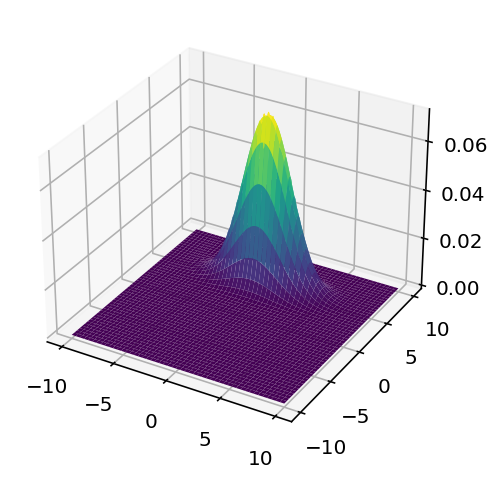

In [31]:
# %matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, func(x_mesh, y_mesh), cmap='viridis')
plt.show()

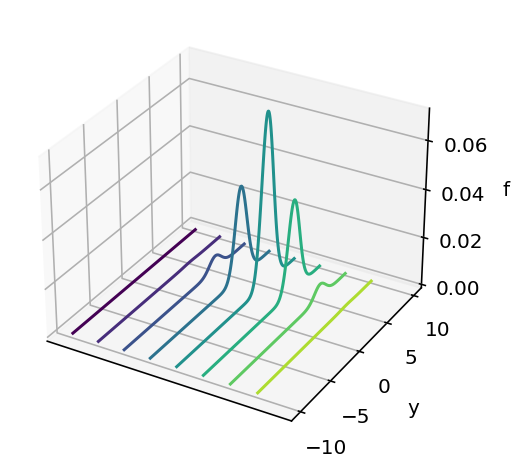

In [32]:
# %matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

curve = ax.contour(x_mesh, y_mesh, func(x_mesh, y_mesh), zdir='x')
plt.ylabel('y')
ax.set_zlabel('f')
ax.set_xticks([])
plt.show()

Next  we can simulate from  a built-in `numpy` function  and calculate a **sample** marginal distribution from the sample mean and variance.

In [33]:
μ= np.array([0, 5])
σ= np.array([[5, .2], [.2, 1]])
n = 1_000_000
data = np.random.multivariate_normal(μ, σ, n)
x = data[:, 0]
y = data[:, 1]

**Marginal distribution**

-0.002005958931285729 2.2337262265098543


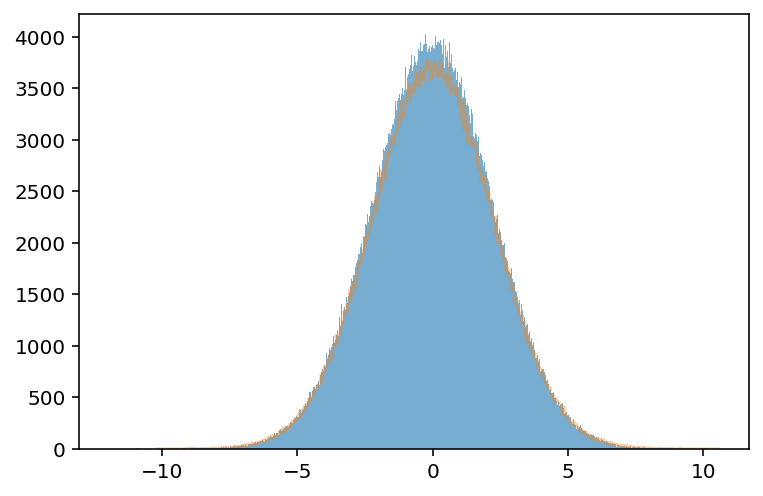

In [34]:
plt.hist(x, bins=1_000, alpha=0.6)
μx_hat, σx_hat = np.mean(x), np.std(x)
print(μx_hat, σx_hat)
x_sim = np.random.normal(μx_hat, σx_hat, 1_000_000)
plt.hist(x_sim, bins=1_000, alpha=0.4, histtype="step")
plt.show()

4.999558082906465 1.0001588925290776


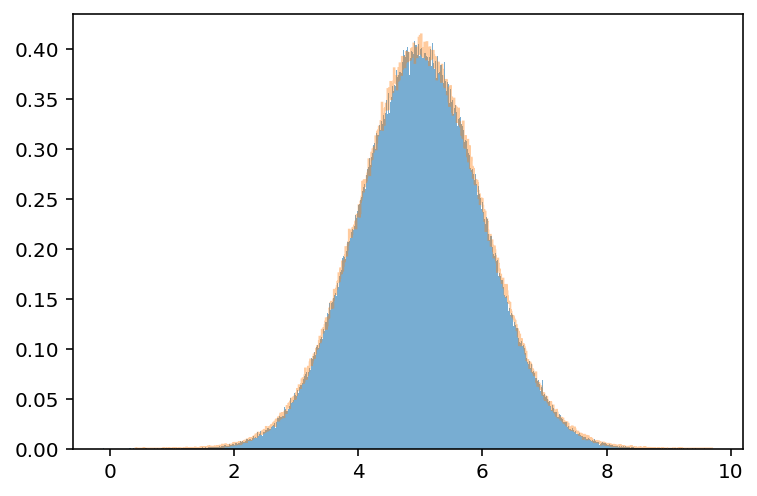

In [35]:
plt.hist(y, bins=1_000, density=True, alpha=0.6)
μy_hat, σy_hat = np.mean(y), np.std(y)
print(μy_hat, σy_hat)
y_sim = np.random.normal(μy_hat, σy_hat, 1_000_000)
plt.hist(y_sim, bins=1_000, density=True, alpha=0.4, histtype="step")
plt.show()

**Conditional distribution**

The population conditional distribution is

$$
\begin{aligned} \\
[X|Y &= y ]\sim \mathbb{N}\bigg[\mu_X+\rho\sigma_X\frac{y-\mu_Y}{\sigma_Y},\sigma_X^2(1-\rho^2)\bigg] \\
[Y|X &= x ]\sim \mathbb{N}\bigg[\mu_Y+\rho\sigma_Y\frac{x-\mu_X}{\sigma_X},\sigma_Y^2(1-\rho^2)\bigg] 
\end{aligned} 
$$

Let's approximate  the joint density by discretizing and mapping the approximating joint density into a  matrix.

We can compute the discretized marginal density  by just using matrix algebra and  noting that 

$$
\textrm{Prob}\{X=i|Y=j\}=\frac{f_{ij}}{\sum_{i}f_{ij}}
$$

Fix $y=0$.

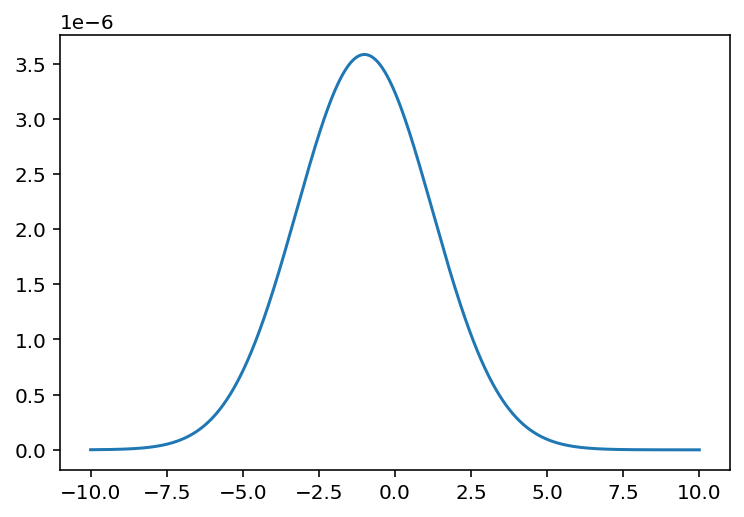

In [36]:
# discretized marginal density
x = np.linspace(-10, 10, 1_000_000)
z = func(x, y=0) / np.sum(func(x, y=0))
plt.plot(x, z)
plt.show()

The mean and variance are computed by

$$
\begin{aligned}
\mathbb{E}\left[X\vert Y=j\right] & =\sum_{i}iProb\{X=i\vert Y=j\}=\sum_{i}i\frac{f_{ij}}{\sum_{i}f_{ij}} \\
\mathbb{D}\left[X\vert Y=j\right] &=\sum_{i}\left(i-\mu_{X\vert Y=j}\right)^{2}\frac{f_{ij}}{\sum_{i}f_{ij}}
\end{aligned}
$$

Let's draw from a normal distribution with above mean and variance and check how accurate our approximation is.

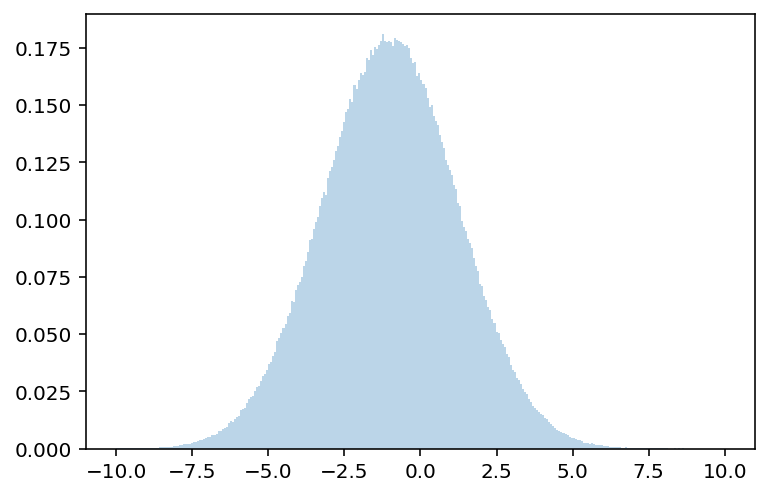

In [37]:
# discretized mean
μx = np.dot(x, z)

# discretized standard deviation
σx = np.sqrt(np.dot((x - μx)**2, z))

# sample
zz = np.random.normal(μx, σx, 1_000_000)
plt.hist(zz, bins=300, density=True, alpha=0.3, range=[-10, 10])
plt.show()

Fix $x=1$.

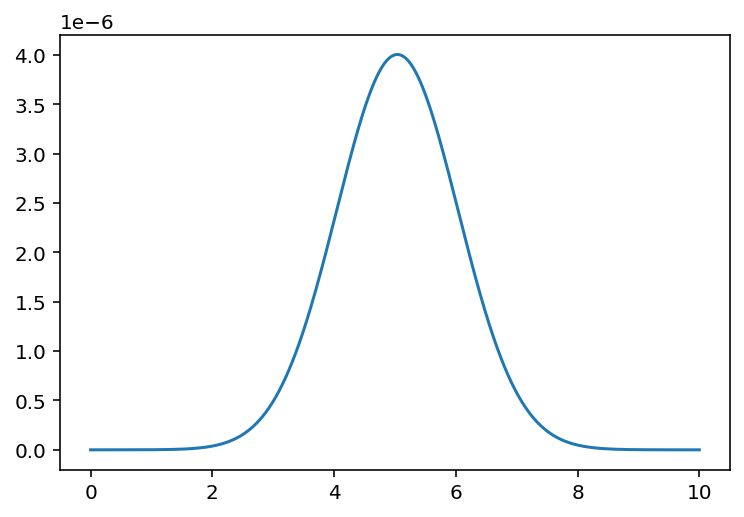

In [38]:
y = np.linspace(0, 10, 1_000_000)
z = func(x=1, y=y) / np.sum(func(x=1, y=y))
plt.plot(y,z)
plt.show()

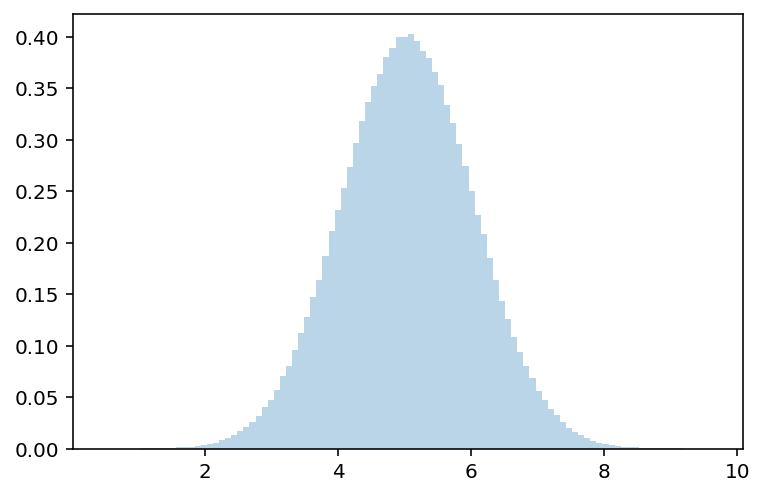

In [39]:
# discretized mean and standard deviation
μy = np.dot(y,z)
σy = np.sqrt(np.dot((y - μy)**2, z))

# sample
zz = np.random.normal(μy,σy,1_000_000)
plt.hist(zz, bins=100, density=True, alpha=0.3)
plt.show()

We compare  with the analytically computed parameters and note that they are close.

In [40]:
print(μx, σx)
print(μ1 + ρ * σ1 * (0 - μ2) / σ2, np.sqrt(σ1**2 * (1 - ρ**2)))

print(μy, σy)
print(μ2 + ρ * σ2 * (1 - μ1) / σ1, np.sqrt(σ2**2 * (1 - ρ**2)))

-0.9997518414498433 2.22658413316977
-1.0 2.227105745132009
5.039999456960771 0.9959851265795592
5.04 0.9959919678390986


## Sum of Two Independently Distributed Random Variables

Let $X, Y$ be two independent discrete random variables that take values in $\bar{X}, \bar{Y}$, respectively.

Define a new random variable $Z=X+Y$. 

Evidently, $Z$ takes values from $\bar{Z}$ defined as follows:

$$
\begin{aligned} 
\bar{X} & =\{0,1,\ldots,I-1\};\qquad f_i= \textrm{Prob} \{X=i\}\\
\bar{Y} & =\{0,1,\ldots,J-1\};\qquad g_j= \textrm{Prob}\{Y=j\}\\
\bar{Z}& =\{0,1,\ldots,I+J-2\};\qquad h_k=  \textrm{Prob} \{X+Y=k\}
\end{aligned}
$$

Independence of $X$ and $ Y$ implies that

$$
\begin{aligned}
h_k & =\textrm{Prob}\{X=0,Y=k\}+\textrm{Prob}\{X=1,Y=k-1\}+\ldots+\textrm{Prob}\{X=k,Y=0\}\\
h_k& =f_0g_k+f_1g_{k-1}+\ldots+f_{k-1}g_1+f_kg_0 \qquad \text{for}\quad k=0,1,\ldots,I+J-2
\end{aligned}
$$

Thus, we have:

$$ 
h_k=\sum_{i=0}^{k} f_ig_{k-i} \equiv f*g 
$$

where $f * g$ denotes the **convolution** of the  $f$ and $g$ sequences.

Similarly, for  two random variables $X,Y$ with  densities $f_{X}, g_{Y}$, the density of $Z=X+Y$ is 

$$
f_{Z}(z)=\int_{-\infty}^{\infty} f_{X}(x) f_{Y}(z-x) dx \equiv f_{X}*g_{Y}
$$

where $ f_{X}*g_{Y} $ denotes the **convolution** of the $f_X$ and $g_Y$ functions.

## Transition Probability Matrix

Consider the following joint probability distribution of  two random variables.

Let $X,Y$ be discrete random variables with joint distribution

$$
\textrm{Prob}\{X=i,Y=j\} = \rho_{ij}
$$

where $i = 0,\dots,I-1; j = 0,\dots,J-1$ and 

$$
\sum_i\sum_j \rho_{ij} = 1, \quad \rho_{ij} \geqslant 0.
$$

An associated conditional distribution is 

$$
\textrm{Prob}\{Y=i\vert X=j\} = \frac{\rho_{ij}}{ \sum_{i}\rho_{ij}}
= \frac{\textrm{Prob}\{Y=j, X=i\}}{\textrm{Prob}\{ X=i\}}
$$

We can define a transition probability matrix

$$
p_{ij}=\textrm{Prob}\{Y=j|X=i\}= \frac{\rho_{ij}}{ \sum_{j}\rho_{ij}}
$$

where 

$$
\left[
   \begin{matrix}
  p_{11} & p_{12}\\
  p_{21} & p_{22}
  \end{matrix}
\right]
$$

The first row is the probability of $Y=j, j=0,1$ conditional on $X=0$.

The second row is the probability of $Y=j, j=0,1$ conditional on $X=1$.

Note that 
- $\sum_{j}\rho_{ij}= \frac{ \sum_{j}\rho_{ij}}{ \sum_{j}\rho_{ij}}=1$, so each row of $\rho$ is a probability distribution (not so for each column.

## Coupling

Start with a joint distribution

$$
\begin{aligned}
f_{ij} & =\textrm{Prob}\{X=i,Y=j\}\\
i& =0, \cdots，I-1\\
j& =0, \cdots，J-1\\
& \text{stacked to an }I×J\text{ matrix}\\
& e.g. \quad I=1, J=1
\end{aligned}
$$

where 

$$
\left[
   \begin{matrix}
  f_{11} & f_{12}\\
  f_{21} & f_{22}
  \end{matrix}
\right]
$$

From the joint distribution, we have shown above that we  obtain **unique** marginal distributions. 

Now we'll try to go in a reverse direction.

We'll find that from two marginal distributions, can we usually construct more than one   joint distribution that verifies these marginals.

Each of these joint distributions is called a **coupling** of the two martingal distributions.

Let's start with marginal distributions

$$
\begin{aligned}
\text{Prob} \{X=i\} &=  \sum_{j}f_{ij}=\mu_{i}, i=0, \cdots, I-1\\
\text{Prob} \{Y=j\}&=  \sum_{j}f_{ij}=\nu_{j}, j=0, \cdots, J-1
\end{aligned}
$$

Given two marginal distribution, $\mu$ for $X$ and $\nu$ for $Y$, a joint distribution $f_{ij}$ is said to be a **coupling** of $\mu$ and $\nu$.

**Example:**

Consider the following bivariate example.

$$
\begin{aligned}
\text{Prob} \{X=0\}= & 1-q  =\mu_{0}\\
\text{Prob} \{X=1\}=& q  =\mu_{1}\\
\text{Prob} \{Y=0\}=& 1-r  =\nu_{0}\\
\text{Prob} \{Y=1\}= & r  =\nu_{1}\\
\text{where } 0 \leq q < r \leq 1
\end{aligned}
$$

We construct  two couplings.

The first coupling if our two marginal distributions is the joint distribution

$$f_{ij}=
\left[
   \begin{matrix}
 (1-q)(1-r)& (1-q)r\\
 q(1-r) & qr\\
  \end{matrix}
\right]
$$

To verify that it is a coupling, we check that 

$$
\begin{aligned}
(1-q)(1-r)+(1-q)r+q(1-r)+qr &=1\\
\mu_{0}= (1-q)(1-r)+(1-q)r & =1-q\\
\mu_{1}= q(1-r)+qr & =q\\
\nu_{0}= (1-q)(1-r)+(1-r)q& =1-r\\
\mu_{1}= r(1-q)+qr& =r
\end{aligned}
$$

A second coupling of our two marginal distributions is the joint distribution


$$
f_{ij}=
\left[
   \begin{matrix}
(1-r)&r-q\\
0 & q\\
  \end{matrix}
\right]
$$

The verify that this is a coupling, note that

$$
\begin{aligned}
1-r+r-q+q &=1\\
\mu_{0}& = 1-q\\
\mu_{1}& = q\\
\nu_{0}& = 1-r\\
\nu_{1}& = r
\end{aligned}
$$

Thus, our two proposed joint distributions have the same marginal distributions.

But the joint distributions differ. 

Thus, multiple  joint distributions $[f_{ij}]$ can have  the same marginals.

**Remark:**
- Couplings  are important in optimal transport problems and in Markov processes.

## Copula Functions

Suppose that $X_1, X_2, \dots, X_n$ are $N$ random variables  and that 

* their marginal distributions are $F_1(x_1), F_2(x_2),\dots, F_N(x_N)$,  and

* their joint distribution is $H(x_1,x_2,\dots,x_N)$
  
Then there exists a **copula function** $C(\cdot)$  that verifies

$$
H(x_1,x_2,\dots,x_N) = C(F_1(x_1), F_2(x_2),\dots,F_N(x_N)).
$$

We can obtain

$$
C(u_1,u_2,\dots,u_n) = H[F^{-1}_1(u_1),F^{-1}_2(u_2),\dots,F^{-1}_N(u_N)]
$$

In a reverse direction of logic, given univariate  **marginal distributions** 
$F_1(x_1), F_2(x_2),\dots,F_N(x_N)$ and a copula function $C(\cdot)$, the function $H(x_1,x_2,\dots,x_N) = C(F_1(x_1), F_2(x_2),\dots,F_N(x_N))$ is a **coupling** of $F_1(x_1), F_2(x_2),\dots,F_N(x_N)$.

Thus, for given marginal distributions, we can use  a copula function to determine a joint distribution when the associated univariate  random variables are not independent. 


Copula functions are often used to characterize **dependence** of  random variables.

**Discrete marginal distribution**

As mentioned above,  for two given marginal distributions there can be more than one coupling.

For example, consider two  random variables $X, Y$ with distributions

$$
\begin{aligned}
\text{Prob}(X = 0)& = 0.6,\\
\text{Prob}(X = 1) &= 0.4,\\
\text{Prob}(Y = 0)& = 0.3,\\
\text{Prob}(Y = 1) &= 0.7,
\end{aligned}
$$

For these two random variables there can be more than one coupling.

Let's first generate X and Y.

In [41]:
# define parameters
mu = np.array([0.6, 0.4])
nu = np.array([0.3, 0.7])

# number of draws
draws = 1_000_000

# generate draws from uniform distribution
p = np.random.rand(draws)

# generate draws of X and Y via uniform distribution
x = np.ones(draws)
y = np.ones(draws)
x[p <= mu[0]] = 0
x[p > mu[0]] = 1
y[p <= nu[0]] = 0
y[p > nu[0]] = 1

In [42]:
# calculate parameters from draws
q_hat = sum(x[x == 1])/draws
r_hat = sum(y[y == 1])/draws

# print output
print("distribution for x")
xmtb = pt.PrettyTable()
xmtb.field_names = ['x_value', 'x_prob']
xmtb.add_row([0, 1-q_hat])
xmtb.add_row([1, q_hat])
print(xmtb)

print("distribution for y")
ymtb = pt.PrettyTable()
ymtb.field_names = ['y_value', 'y_prob']
ymtb.add_row([0, 1-r_hat])
ymtb.add_row([1, r_hat])
print(ymtb)

distribution for x
+---------+---------+
| x_value |  x_prob |
+---------+---------+
|    0    | 0.60059 |
|    1    | 0.39941 |
+---------+---------+
distribution for y
+---------+---------------------+
| y_value |        y_prob       |
+---------+---------------------+
|    0    | 0.30008599999999996 |
|    1    |       0.699914      |
+---------+---------------------+


Let's now take our two marginal  distributions, one for $X$, the other for  $Y$, and construct  two distinct couplings.

For the first joint distribution:

$$
\textrm{Prob}(X=i,Y=j) = f_{ij}
$$

where

$$
[f_{ij}] = \left[\begin{array}{cc}
0.18 & 0.42\\
0.12 & 0.28
\end{array}\right]
$$

Let's use Python to construct this joint distribution and then verify that its marginal distributions are what we want.

In [43]:
# define parameters
f1 = np.array([[0.18, 0.42], [0.12, 0.28]])
f1_cum = np.cumsum(f1)

# number of draws
draws1 = 1_000_000

# generate draws from uniform distribution
p = np.random.rand(draws1)

# generate draws of first copuling via uniform distribution
c1 = np.vstack([np.ones(draws1), np.ones(draws1)])
# X=0, Y=0
c1[0, p <= f1_cum[0]] = 0
c1[1, p <= f1_cum[0]] = 0
# X=0, Y=1
c1[0, (p > f1_cum[0])*(p <= f1_cum[1])] = 0
c1[1, (p > f1_cum[0])*(p <= f1_cum[1])] = 1
# X=1, Y=0
c1[0, (p > f1_cum[1])*(p <= f1_cum[2])] = 1
c1[1, (p > f1_cum[1])*(p <= f1_cum[2])] = 0
# X=1, Y=1
c1[0, (p > f1_cum[2])*(p <= f1_cum[3])] = 1
c1[1, (p > f1_cum[2])*(p <= f1_cum[3])] = 1

In [44]:
# calculate parameters from draws
f1_00 = sum((c1[0, :] == 0)*(c1[1, :] == 0))/draws1
f1_01 = sum((c1[0, :] == 0)*(c1[1, :] == 1))/draws1
f1_10 = sum((c1[0, :] == 1)*(c1[1, :] == 0))/draws1
f1_11 = sum((c1[0, :] == 1)*(c1[1, :] == 1))/draws1

# print output of first joint distribution
print("first joint distribution for c1")
c1_mtb = pt.PrettyTable()
c1_mtb.field_names = ['c1_x_value', 'c1_y_value', 'c1_prob']
c1_mtb.add_row([0, 0, f1_00])
c1_mtb.add_row([0, 1, f1_01])
c1_mtb.add_row([1, 0, f1_10])
c1_mtb.add_row([1, 1, f1_11])
print(c1_mtb)

first joint distribution for c1
+------------+------------+----------+
| c1_x_value | c1_y_value | c1_prob  |
+------------+------------+----------+
|     0      |     0      | 0.180233 |
|     0      |     1      | 0.420091 |
|     1      |     0      | 0.120086 |
|     1      |     1      | 0.27959  |
+------------+------------+----------+


In [45]:
# calculate parameters from draws
c1_q_hat = sum(c1[0, :] == 1)/draws1
c1_r_hat = sum(c1[1, :] == 1)/draws1

# print output
print("marginal distribution for x")
c1_x_mtb = pt.PrettyTable()
c1_x_mtb.field_names = ['c1_x_value', 'c1_x_prob']
c1_x_mtb.add_row([0, 1-c1_q_hat])
c1_x_mtb.add_row([1, c1_q_hat])
print(c1_x_mtb)

print("marginal distribution for y")
c1_ymtb = pt.PrettyTable()
c1_ymtb.field_names = ['c1_y_value', 'c1_y_prob']
c1_ymtb.add_row([0, 1-c1_r_hat])
c1_ymtb.add_row([1, c1_r_hat])
print(c1_ymtb)

marginal distribution for x
+------------+--------------------+
| c1_x_value |     c1_x_prob      |
+------------+--------------------+
|     0      | 0.6003240000000001 |
|     1      |      0.399676      |
+------------+--------------------+
marginal distribution for y
+------------+-----------+
| c1_y_value | c1_y_prob |
+------------+-----------+
|     0      |  0.300319 |
|     1      |  0.699681 |
+------------+-----------+


Now, let's construct another  joint distribution that is  also a coupling of $X$ and $Y$

$$
[f_{ij}] = \left[\begin{array}{cc}
0.3 & 0.3\\
0 & 0.4
\end{array}\right]
$$

In [46]:
# define parameters
f2 = np.array([[0.3, 0.3], [0, 0.4]])
f2_cum = np.cumsum(f2)

# number of draws
draws2 = 1_000_000

# generate draws from uniform distribution
p = np.random.rand(draws2)

# generate draws of first coupling via uniform distribution
c2 = np.vstack([np.ones(draws2), np.ones(draws2)])
# X=0, Y=0
c2[0, p <= f2_cum[0]] = 0
c2[1, p <= f2_cum[0]] = 0
# X=0, Y=1
c2[0, (p > f2_cum[0])*(p <= f2_cum[1])] = 0
c2[1, (p > f2_cum[0])*(p <= f2_cum[1])] = 1
# X=1, Y=0
c2[0, (p > f2_cum[1])*(p <= f2_cum[2])] = 1
c2[1, (p > f2_cum[1])*(p <= f2_cum[2])] = 0
# X=1, Y=1
c2[0, (p > f2_cum[2])*(p <= f2_cum[3])] = 1
c2[1, (p > f2_cum[2])*(p <= f2_cum[3])] = 1

In [47]:
# calculate parameters from draws
f2_00 = sum((c2[0, :] == 0)*(c2[1, :] == 0))/draws2
f2_01 = sum((c2[0, :] == 0)*(c2[1, :] == 1))/draws2
f2_10 = sum((c2[0, :] == 1)*(c2[1, :] == 0))/draws2
f2_11 = sum((c2[0, :] == 1)*(c2[1, :] == 1))/draws2

# print output of second joint distribution
print("first joint distribution for c2")
c2_mtb = pt.PrettyTable()
c2_mtb.field_names = ['c2_x_value', 'c2_y_value', 'c2_prob']
c2_mtb.add_row([0, 0, f2_00])
c2_mtb.add_row([0, 1, f2_01])
c2_mtb.add_row([1, 0, f2_10])
c2_mtb.add_row([1, 1, f2_11])
print(c2_mtb)

first joint distribution for c2
+------------+------------+----------+
| c2_x_value | c2_y_value | c2_prob  |
+------------+------------+----------+
|     0      |     0      | 0.300548 |
|     0      |     1      | 0.300138 |
|     1      |     0      |   0.0    |
|     1      |     1      | 0.399314 |
+------------+------------+----------+


In [48]:
# calculate parameters from draws
c2_q_hat = sum(c2[0, :] == 1)/draws2
c2_r_hat = sum(c2[1, :] == 1)/draws2

# print output
print("marginal distribution for x")
c2_x_mtb = pt.PrettyTable()
c2_x_mtb.field_names = ['c2_x_value', 'c2_x_prob']
c2_x_mtb.add_row([0, 1-c2_q_hat])
c2_x_mtb.add_row([1, c2_q_hat])
print(c2_x_mtb)

print("marginal distribution for y")
c2_ymtb = pt.PrettyTable()
c2_ymtb.field_names = ['c2_y_value', 'c2_y_prob']
c2_ymtb.add_row([0, 1-c2_r_hat])
c2_ymtb.add_row([1, c2_r_hat])
print(c2_ymtb)

marginal distribution for x
+------------+-----------+
| c2_x_value | c2_x_prob |
+------------+-----------+
|     0      |  0.600686 |
|     1      |  0.399314 |
+------------+-----------+
marginal distribution for y
+------------+---------------------+
| c2_y_value |      c2_y_prob      |
+------------+---------------------+
|     0      | 0.30054800000000004 |
|     1      |       0.699452      |
+------------+---------------------+


We have verified that both joint distributions, $c_1$ and $c_2$, have identical marginal distributions of $X$ and $Y$, respectively.

So they are both couplings of $X$ and $Y$.

## Time Series 

Suppose that there are two time periods.

- $t=0$  "today"
- $t=1$  "tomorrow"

Let $X(0)$ be a random variable to be realized at $t=0$, $X(1)$  be a random variable to be realized at $t=1$.
   
Suppose that

$$
\begin{aligned}
\text{Prob} \{X(0)=i,X(1)=j\} &=f_{ij}≥0，i=0,\cdots,I-1\\
\sum_{i}\sum_{j}f_{ij}&=1
\end{aligned}
$$

$f_{ij} $ is a joint distribution over $[X(0), X(1)]$.

A conditional distribution is

$$\text{Prob} \{X(1)=j|X(0)=i\}= \frac{f_{ij}}{ \sum_{j}f_{ij}}$$

**Remark:** 
- This is a key formula for  a theory of optimally predicting a time series.